In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [60]:
transaction_df = pd.read_csv("/Users/siddarthnachannagari/Accidental-Transfer-Alerter-Project/synthetic_transactions_1M.csv")

In [61]:
transaction_df.head(10)

,customer_id,transaction_id,timestamp,transaction_type,amount,is_accident_burst,is_high_amount_accident,is_mistyped_entity_accident,city,entity_type,recipient_entity,original_recipient_entity
0,customer_001,customer_001-00000001,2024-01-01 02:46:14.935347,Online Purchase (Non-Card),260.49,False,False,False,San Francisco,E-commerce Giant,Target.com,Target.com
1,customer_001,customer_001-00000002,2024-01-01 05:26:58.789989,Bank Transfer (ACH),592.68,False,False,False,San Francisco,Friend/Family Transfer,70000053,70000053
2,customer_001,customer_001-00000003,2024-01-01 08:16:51.015948,Online Purchase (Non-Card),112.17,False,False,False,San Francisco,E-commerce Giant,Amazon,Amazon
3,customer_001,customer_001-00000004,2024-01-01 08:36:18.730340,Online Purchase (Non-Card),28.44,False,False,False,New York,Subscription Service,Adobe Creative Cloud,Adobe Creative Cloud
4,customer_001,customer_001-00000005,2024-01-01 10:32:20.631425,Credit Card (POS/Online),101.33,False,False,False,San Francisco,Healthcare,MediCare Pharmacy,MediCare Pharmacy
5,customer_001,customer_001-00000006,2024-01-01 11:50:43.521183,Credit Card (POS/Online),45.90,False,False,False,San Francisco,Grocery,SuperMart,SuperMart
6,customer_001,customer_001-00000007,2024-01-01 12:58:37.943279,Credit Card (POS/Online),141.88,False,False,False,New York,Travel,RoadTrips,RoadTrips
7,customer_001,customer_001-00000008,2024-01-01 13:21:30.177888,Credit Card (POS/Online),92.40,False,False,False,San Francisco,Online Service,CloudStoragePro,CloudStoragePro
8,customer_001,customer_001-00000009,2024-01-01 13:22:16.529850,Credit Card (POS/Online),99.20,False,False,False,San Francisco,Healthcare,Dr. Visit Co-pay,Dr. Visit Co-pay
9,customer_001,customer_001-00000010,2024-01-01 14:03:07.655427,Venmo/PayPal Transfer,113.30,False,False,False,San Francisco,Small Business,Yoga Studio,Yoga Studio


In [62]:
transaction_df['is_accident_burst'] = transaction_df['is_accident_burst'].astype(int)

In [63]:
transaction_df['is_high_amount_accident'] = transaction_df['is_high_amount_accident'].astype(int)

In [64]:
transaction_df['is_mistyped_entity_accident'] = transaction_df['is_mistyped_entity_accident'].astype(int)

In [65]:
transaction_df.head(20)

,customer_id,transaction_id,timestamp,transaction_type,amount,is_accident_burst,is_high_amount_accident,is_mistyped_entity_accident,city,entity_type,recipient_entity,original_recipient_entity
0,customer_001,customer_001-00000001,2024-01-01 02:46:14.935347,Online Purchase (Non-Card),260.49,0,0,0,San Francisco,E-commerce Giant,Target.com,Target.com
1,customer_001,customer_001-00000002,2024-01-01 05:26:58.789989,Bank Transfer (ACH),592.68,0,0,0,San Francisco,Friend/Family Transfer,70000053,70000053
2,customer_001,customer_001-00000003,2024-01-01 08:16:51.015948,Online Purchase (Non-Card),112.17,0,0,0,San Francisco,E-commerce Giant,Amazon,Amazon
3,customer_001,customer_001-00000004,2024-01-01 08:36:18.730340,Online Purchase (Non-Card),28.44,0,0,0,New York,Subscription Service,Adobe Creative Cloud,Adobe Creative Cloud
4,customer_001,customer_001-00000005,2024-01-01 10:32:20.631425,Credit Card (POS/Online),101.33,0,0,0,San Francisco,Healthcare,MediCare Pharmacy,MediCare Pharmacy
5,customer_001,customer_001-00000006,2024-01-01 11:50:43.521183,Credit Card (POS/Online),45.90,0,0,0,San Francisco,Grocery,SuperMart,SuperMart
6,customer_001,customer_001-00000007,2024-01-01 12:58:37.943279,Credit Card (POS/Online),141.88,0,0,0,New York,Travel,RoadTrips,RoadTrips
7,customer_001,customer_001-00000008,2024-01-01 13:21:30.177888,Credit Card (POS/Online),92.40,0,0,0,San Francisco,Online Service,CloudStoragePro,CloudStoragePro
8,customer_001,customer_001-00000009,2024-01-01 13:22:16.529850,Credit Card (POS/Online),99.20,0,0,0,San Francisco,Healthcare,Dr. Visit Co-pay,Dr. Visit Co-pay
9,customer_001,customer_001-00000010,2024-01-01 14:03:07.655427,Venmo/PayPal Transfer,113.30,0,0,0,San Francisco,Small Business,Yoga Studio,Yoga Studio


In [66]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4447470 entries, 0 to 4447469
Data columns (total 12 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   customer_id                  object 
 1   transaction_id               object 
 2   timestamp                    object 
 3   transaction_type             object 
 4   amount                       float64
 5   is_accident_burst            int64  
 6   is_high_amount_accident      int64  
 7   is_mistyped_entity_accident  int64  
 8   city                         object 
 9   entity_type                  object 
 10  recipient_entity             object 
 11  original_recipient_entity    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 407.2+ MB


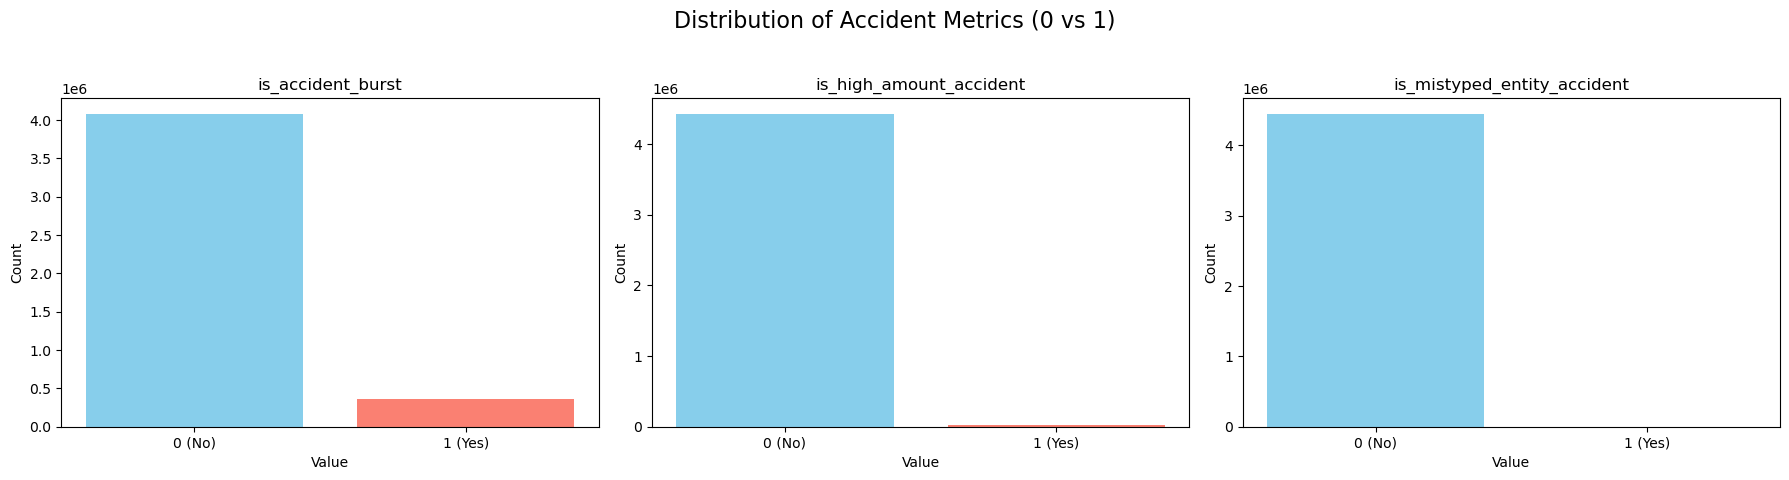

In [67]:
metrics = ['is_accident_burst', 'is_high_amount_accident', 'is_mistyped_entity_accident']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Accident Metrics (0 vs 1)', fontsize=16)

for i, metric in enumerate(metrics):
    counts = transaction_df[metric].value_counts().sort_index()
    axes[i].bar(counts.index.astype(str), counts.values, color=['skyblue', 'salmon'])
    axes[i].set_title(metric)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['0 (No)', '1 (Yes)'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

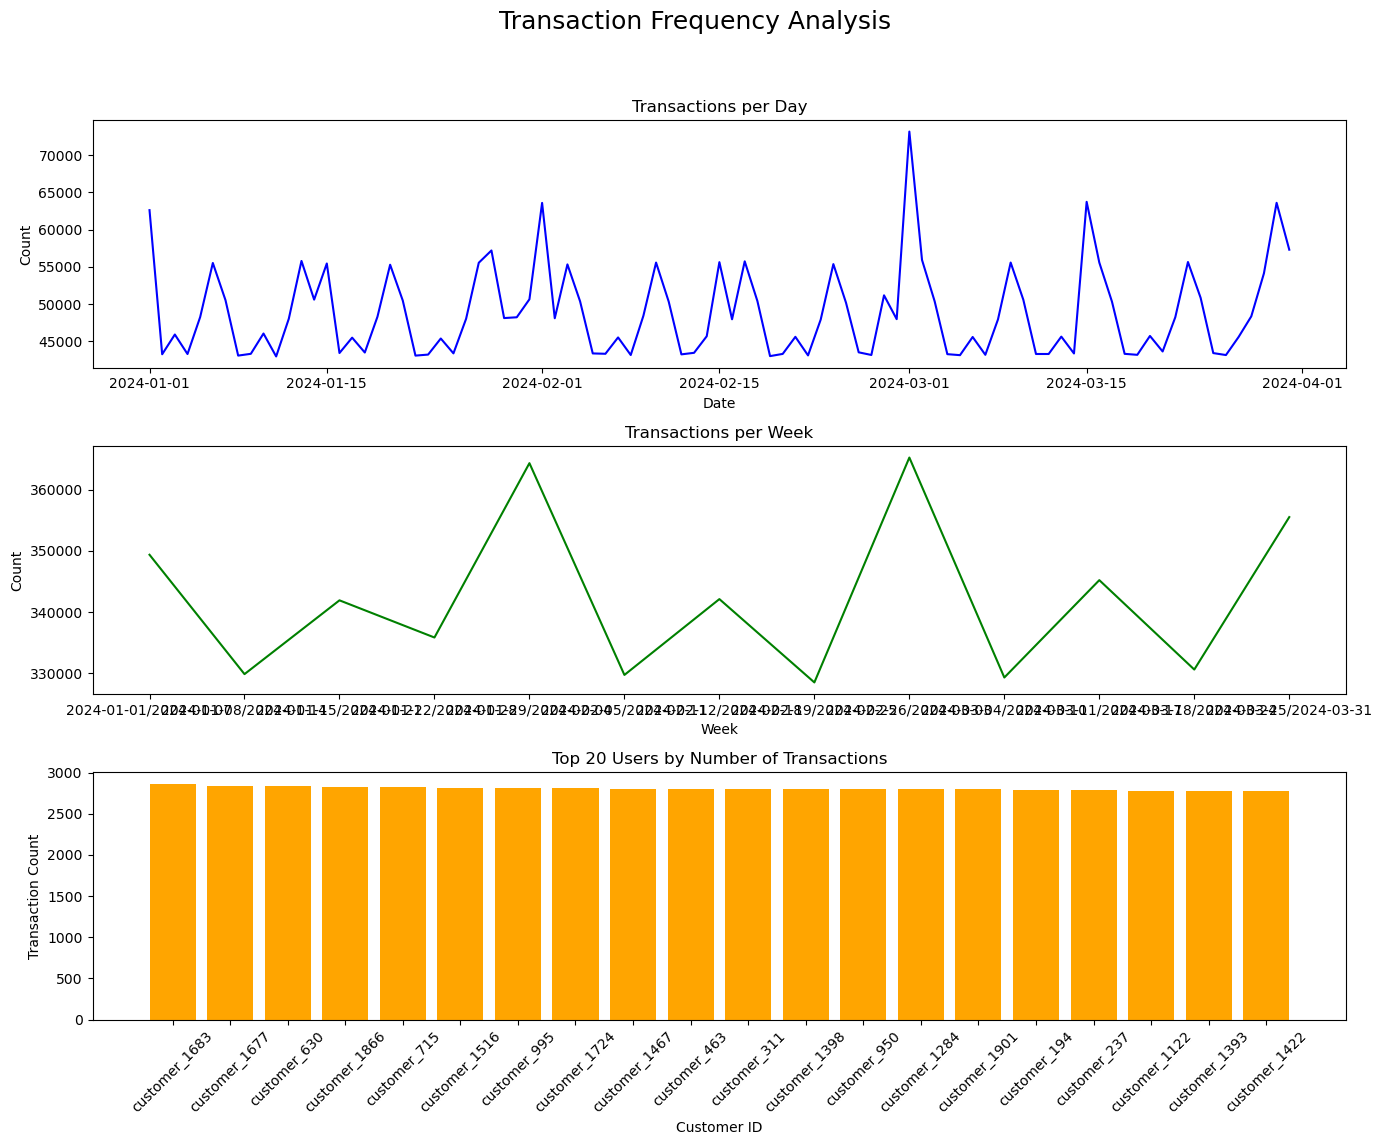

In [68]:
transaction_df['timestamp'] = pd.to_datetime(transaction_df['timestamp'])

# transactions per day
per_day = transaction_df.groupby(transaction_df['timestamp'].dt.date).size()

# transactions per week
per_week = transaction_df.groupby(transaction_df['timestamp'].dt.to_period('W')).size()

# transactions per user
per_user = transaction_df['customer_id'].value_counts()

fig, axes = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('Transaction Frequency Analysis', fontsize=18)

# Plot per day
axes[0].plot(per_day.index, per_day.values, color='blue')
axes[0].set_title('Transactions per Day')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Count')

# Plot per week
axes[1].plot(per_week.index.astype(str), per_week.values, color='green')
axes[1].set_title('Transactions per Week')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Count')

# Plot per user (top 20 for readability)
axes[2].bar(per_user.head(20).index, per_user.head(20).values, color='orange')
axes[2].set_title('Top 20 Users by Number of Transactions')
axes[2].set_xlabel('Customer ID')
axes[2].set_ylabel('Transaction Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [69]:
import pandas as pd

# Ensure timestamp is datetime
transaction_df['timestamp'] = pd.to_datetime(transaction_df['timestamp'])

# Sort by user and timestamp
transaction_df = transaction_df.sort_values(by=['customer_id', 'timestamp'])

# Set timestamp as index (needed for time-based rolling)
transaction_df.set_index('timestamp', inplace=True)

# Group by user
grouped = transaction_df.groupby('customer_id')

# 1. Mean transaction amount over past 24 hours
transaction_df['mean_24hr'] = grouped['amount'].rolling('24H').mean().reset_index(level=0, drop=True)

# 2. Std deviation over past 30 days
transaction_df['stddev_30day'] = grouped['amount'].rolling('30D').std().reset_index(level=0, drop=True)

# 3. Max amount over rolling 7-day window
transaction_df['max_amount_7day'] = grouped['amount'].rolling('7D').max().reset_index(level=0, drop=True)

# Reset index back if needed
transaction_df.reset_index(inplace=True)


/var/folders/nd/vz39pkrs2r9bwv9tg2ysjr_40000gn/T/ipykernel_24316/4153011949.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  transaction_df['mean_24hr'] = grouped['amount'].rolling('24H').mean().reset_index(level=0, drop=True)


In [70]:
print(transaction_df[['customer_id', 'timestamp', 'amount', 'mean_24hr', 'stddev_30day', 'max_amount_7day']].head(10))


    customer_id                  timestamp  amount   mean_24hr  stddev_30day  \
0  customer_001 2024-01-01 02:46:14.935347  260.49  260.490000           NaN   
1  customer_001 2024-01-01 05:26:58.789989  592.68  426.585000    234.893802   
2  customer_001 2024-01-01 08:16:51.015948  112.17  321.780000    246.048396   
3  customer_001 2024-01-01 08:36:18.730340   28.44  248.445000    248.740757   
4  customer_001 2024-01-01 10:32:20.631425  101.33  219.022000    225.238846   
5  customer_001 2024-01-01 11:50:43.521183   45.90  190.168333    213.497622   
6  customer_001 2024-01-01 12:58:37.943279  141.88  183.270000    195.748490   
7  customer_001 2024-01-01 13:21:30.177888   92.40  171.911250    184.053570   
8  customer_001 2024-01-01 13:22:16.529850   99.20  163.832222    173.863993   
9  customer_001 2024-01-01 14:03:07.655427  113.30  158.779000    164.697588   

   max_amount_7day  
0           260.49  
1           592.68  
2           592.68  
3           592.68  
4           59

In [71]:
# Drop rows with any NaNs in the feature columns
model_df = transaction_df.dropna(subset=['mean_24hr', 'stddev_30day', 'max_amount_7day'])


In [72]:
print(model_df[['customer_id', 'timestamp', 'amount', 'mean_24hr', 'stddev_30day', 'max_amount_7day']].head())


    customer_id                  timestamp  amount   mean_24hr  stddev_30day  \
1  customer_001 2024-01-01 05:26:58.789989  592.68  426.585000    234.893802   
2  customer_001 2024-01-01 08:16:51.015948  112.17  321.780000    246.048396   
3  customer_001 2024-01-01 08:36:18.730340   28.44  248.445000    248.740757   
4  customer_001 2024-01-01 10:32:20.631425  101.33  219.022000    225.238846   
5  customer_001 2024-01-01 11:50:43.521183   45.90  190.168333    213.497622   

   max_amount_7day  
1           592.68  
2           592.68  
3           592.68  
4           592.68  
5           592.68  


In [73]:
print(f"Original rows: {len(transaction_df)}")
print(f"After dropna: {len(model_df)}")


Original rows: 4447470
After dropna: 4445470


In [74]:
print(transaction_df.columns.tolist())


['timestamp', 'customer_id', 'transaction_id', 'transaction_type', 'amount', 'is_accident_burst', 'is_high_amount_accident', 'is_mistyped_entity_accident', 'city', 'entity_type', 'recipient_entity', 'original_recipient_entity', 'mean_24hr', 'stddev_30day', 'max_amount_7day']


In [75]:
# Make sure timestamp is datetime
transaction_df['timestamp'] = pd.to_datetime(transaction_df['timestamp'])

# Extract time-based features
transaction_df['hour_of_day'] = transaction_df['timestamp'].dt.hour
transaction_df['day_of_week'] = transaction_df['timestamp'].dt.dayofweek   # Monday=0, Sunday=6
transaction_df['day_of_month'] = transaction_df['timestamp'].dt.day
transaction_df['month_of_year'] = transaction_df['timestamp'].dt.month

# Create binary flag for weekend (Saturday=5, Sunday=6)
transaction_df['is_weekend'] = transaction_df['day_of_week'].isin([5,6]).astype(int)

# Sort data by user and timestamp to calculate time since last transaction
transaction_df = transaction_df.sort_values(by=['customer_id', 'timestamp'])

# Calculate time since last transaction for each user (in seconds)
transaction_df['time_since_last_txn'] = transaction_df.groupby('customer_id')['timestamp'].diff().dt.total_seconds()

# Optional: For first transaction per user, fill NaN with some value, e.g. -1 or 0
transaction_df['time_since_last_txn'].fillna(-1, inplace=True)

# Preview
print(transaction_df[['customer_id', 'timestamp', 'hour_of_day', 'day_of_week', 'is_weekend', 'time_since_last_txn']].head())


    customer_id                  timestamp  hour_of_day  day_of_week  \
0  customer_001 2024-01-01 02:46:14.935347            2            0   
1  customer_001 2024-01-01 05:26:58.789989            5            0   
2  customer_001 2024-01-01 08:16:51.015948            8            0   
3  customer_001 2024-01-01 08:36:18.730340            8            0   
4  customer_001 2024-01-01 10:32:20.631425           10            0   

   is_weekend  time_since_last_txn  
0           0            -1.000000  
1           0          9643.854642  
2           0         10192.225959  
3           0          1167.714392  
4           0          6961.901085  


/var/folders/nd/vz39pkrs2r9bwv9tg2ysjr_40000gn/T/ipykernel_24316/3935867256.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transaction_df['time_since_last_txn'].fillna(-1, inplace=True)


In [76]:
transaction_df.head(10)

,timestamp,customer_id,transaction_id,transaction_type,amount,is_accident_burst,is_high_amount_accident,is_mistyped_entity_accident,city,entity_type,...,original_recipient_entity,mean_24hr,stddev_30day,max_amount_7day,hour_of_day,day_of_week,day_of_month,month_of_year,is_weekend,time_since_last_txn
0,2024-01-01 02:46:14.935347,customer_001,customer_001-00000001,Online Purchase (Non-Card),260.49,0,0,0,San Francisco,E-commerce Giant,...,Target.com,260.490000,NaN,260.49,2,0,1,1,0,-1.000000
1,2024-01-01 05:26:58.789989,customer_001,customer_001-00000002,Bank Transfer (ACH),592.68,0,0,0,San Francisco,Friend/Family Transfer,...,70000053,426.585000,234.893802,592.68,5,0,1,1,0,9643.854642
2,2024-01-01 08:16:51.015948,customer_001,customer_001-00000003,Online Purchase (Non-Card),112.17,0,0,0,San Francisco,E-commerce Giant,...,Amazon,321.780000,246.048396,592.68,8,0,1,1,0,10192.225959
3,2024-01-01 08:36:18.730340,customer_001,customer_001-00000004,Online Purchase (Non-Card),28.44,0,0,0,New York,Subscription Service,...,Adobe Creative Cloud,248.445000,248.740757,592.68,8,0,1,1,0,1167.714392
4,2024-01-01 10:32:20.631425,customer_001,customer_001-00000005,Credit Card (POS/Online),101.33,0,0,0,San Francisco,Healthcare,...,MediCare Pharmacy,219.022000,225.238846,592.68,10,0,1,1,0,6961.901085
5,2024-01-01 11:50:43.521183,customer_001,customer_001-00000006,Credit Card (POS/Online),45.90,0,0,0,San Francisco,Grocery,...,SuperMart,190.168333,213.497622,592.68,11,0,1,1,0,4702.889758
6,2024-01-01 12:58:37.943279,customer_001,customer_001-00000007,Credit Card (POS/Online),141.88,0,0,0,New York,Travel,...,RoadTrips,183.270000,195.748490,592.68,12,0,1,1,0,4074.422096
7,2024-01-01 13:21:30.177888,customer_001,customer_001-00000008,Credit Card (POS/Online),92.40,0,0,0,San Francisco,Online Service,...,CloudStoragePro,171.911250,184.053570,592.68,13,0,1,1,0,1372.234609
8,2024-01-01 13:22:16.529850,customer_001,customer_001-00000009,Credit Card (POS/Online),99.20,0,0,0,San Francisco,Healthcare,...,Dr. Visit Co-pay,163.832222,173.863993,592.68,13,0,1,1,0,46.351962
9,2024-01-01 14:03:07.655427,customer_001,customer_001-00000010,Venmo/PayPal Transfer,113.30,0,0,0,San Francisco,Small Business,...,Yoga Studio,158.779000,164.697588,592.68,14,0,1,1,0,2451.125577


In [77]:
transaction_df = transaction_df.sort_values(['customer_id', 'recipient_entity', 'timestamp'])
transaction_df.set_index('timestamp', inplace=True)

grouped = transaction_df.groupby(['customer_id', 'recipient_entity'])

rolling_mean = grouped['amount'].rolling(window=30, min_periods=1).mean().shift(1)
rolling_std = grouped['amount'].rolling(window=30, min_periods=1).std().shift(1)

# rolling_mean and rolling_std will have MultiIndex (customer_id, recipient_entity, timestamp)
# We want to assign these back keeping the original index

# Remove multiindex to match original DataFrame's index
rolling_mean.index = rolling_mean.index.droplevel([0,1])
rolling_std.index = rolling_std.index.droplevel([0,1])

transaction_df['mean_amount_rolling'] = rolling_mean
transaction_df['std_amount_rolling'] = rolling_std

# Calculate deviation
transaction_df['amount_deviation_rolling'] = (
    (transaction_df['amount'] - transaction_df['mean_amount_rolling']) / transaction_df['std_amount_rolling']
).fillna(0)

transaction_df.reset_index(inplace=True)


In [78]:
print(transaction_df.columns.tolist())


['timestamp', 'customer_id', 'transaction_id', 'transaction_type', 'amount', 'is_accident_burst', 'is_high_amount_accident', 'is_mistyped_entity_accident', 'city', 'entity_type', 'recipient_entity', 'original_recipient_entity', 'mean_24hr', 'stddev_30day', 'max_amount_7day', 'hour_of_day', 'day_of_week', 'day_of_month', 'month_of_year', 'is_weekend', 'time_since_last_txn', 'mean_amount_rolling', 'std_amount_rolling', 'amount_deviation_rolling']


In [79]:
transaction_df.head(10)

,timestamp,customer_id,transaction_id,transaction_type,amount,is_accident_burst,is_high_amount_accident,is_mistyped_entity_accident,city,entity_type,...,max_amount_7day,hour_of_day,day_of_week,day_of_month,month_of_year,is_weekend,time_since_last_txn,mean_amount_rolling,std_amount_rolling,amount_deviation_rolling
0,2024-01-26 13:28:17.289738,customer_001,customer_001-00000718,Venmo/PayPal Transfer,46.28,0,0,0,San Francisco,Person-to-Person,...,4817.70,13,4,26,1,0,2097.282216,NaN,NaN,0.000000
1,2024-02-27 14:03:37.885272,customer_001,customer_001-00001568,Venmo/PayPal Transfer,210.84,0,0,0,San Francisco,Person-to-Person,...,4499.53,14,1,27,2,0,68.600373,46.280000,NaN,0.000000
2,2024-03-31 01:00:34.581709,customer_001,customer_001-00002482,Venmo/PayPal Transfer,89.32,0,0,0,San Francisco,Person-to-Person,...,4885.50,1,6,31,3,1,6643.464803,128.560000,116.361492,-0.337225
3,2024-02-19 01:19:49.096442,customer_001,customer_001-00001369-A1,Venmo/PayPal Transfer,54.16,1,0,0,San Francisco,Person-to-Person,...,4557.25,1,0,19,2,0,3.179969,115.480000,85.342004,-0.718521
4,2024-02-13 18:58:32.774288,customer_001,customer_001-00001216,Venmo/PayPal Transfer,58.11,0,0,0,San Francisco,Person-to-Person,...,4965.81,18,1,13,2,0,7840.639311,54.160000,NaN,0.000000
5,2024-01-19 22:38:26.606163,customer_001,customer_001-00000531,Venmo/PayPal Transfer,291.22,0,0,0,San Francisco,Person-to-Person,...,4958.54,22,4,19,1,0,9905.133177,58.110000,NaN,0.000000
6,2024-01-29 17:39:50.363707,customer_001,customer_001-00000819,Venmo/PayPal Transfer,144.51,0,0,0,San Francisco,Person-to-Person,...,4862.92,17,0,29,1,0,740.956903,291.220000,NaN,0.000000
7,2024-03-03 10:39:42.963161,customer_001,customer_001-00001724-A2,Venmo/PayPal Transfer,227.35,1,0,0,San Francisco,Person-to-Person,...,4499.53,10,6,3,3,1,1.932729,217.865000,103.739636,0.091431
8,2024-03-11 14:11:30.713960,customer_001,customer_001-00001946,Venmo/PayPal Transfer,168.02,0,0,0,San Francisco,Person-to-Person,...,4988.20,14,0,11,3,0,453.105269,221.026667,73.559122,-0.720600
9,2024-03-23 14:18:55.506530,customer_001,customer_001-00002263,Venmo/PayPal Transfer,25.99,0,0,0,San Francisco,Person-to-Person,...,4641.53,14,5,23,3,1,679.643417,207.775000,65.648480,-2.769066


In [80]:
# Sort by user and timestamp
transaction_df = transaction_df.sort_values(['customer_id', 'timestamp'])

# Group by user and recipient and get first transaction timestamp per group
first_transfer = transaction_df.groupby(['customer_id', 'recipient_entity'])['timestamp'].min().reset_index()

# Merge back to original and flag if this transaction is the first time
transaction_df = transaction_df.merge(first_transfer, on=['customer_id', 'recipient_entity'], suffixes=('', '_first'))

transaction_df['is_new_recipient'] = (transaction_df['timestamp'] == transaction_df['timestamp_first']).astype(int)

# Drop helper column
transaction_df.drop(columns=['timestamp_first'], inplace=True)


In [81]:
X = 1 # Define the time window in minutes for duplicate detection

# Sort by user and timestamp
transaction_df = transaction_df.sort_values(['customer_id', 'timestamp'])

# Create a helper column combining recipient and amount (to match duplicates)
transaction_df['recipient_amount'] = transaction_df['recipient_entity'].astype(str) + '_' + transaction_df['amount'].astype(str)

# Group by user and the combined column
grouped = transaction_df.groupby(['customer_id', 'recipient_amount'])

# Calculate time difference to previous transaction with same recipient+amount
transaction_df['time_diff'] = grouped['timestamp'].diff().dt.total_seconds().div(60)  # in minutes

# Flag duplicates within X minutes (exclude first transaction with NaN diff)
transaction_df['is_duplicate_transaction_within_X_minutes'] = ((transaction_df['time_diff'] <= X) & (transaction_df['time_diff'] > 0)).astype(int)

# Clean up helper columns if you want
transaction_df.drop(columns=['recipient_amount', 'time_diff'], inplace=True)

In [82]:
# Convert timestamp to seconds since midnight
transaction_df['seconds_since_midnight'] = transaction_df['timestamp'].dt.hour * 3600 + transaction_df['timestamp'].dt.minute * 60 + transaction_df['timestamp'].dt.second

# Group by user and recipient, get mean scheduled time in seconds
mean_time = transaction_df.groupby(['customer_id', 'recipient_entity'])['seconds_since_midnight'].transform('mean')

# Calculate absolute deviation in seconds
transaction_df['time_deviation_from_user_norm'] = (transaction_df['seconds_since_midnight'] - mean_time).abs()

# Optionally drop helper column
transaction_df.drop(columns=['seconds_since_midnight'], inplace=True)

In [83]:
# Sort by user and timestamp
transaction_df = transaction_df.sort_values(['customer_id', 'timestamp'])

# Group by user, collect unique locations seen before each transaction
transaction_df['is_unusual_location_for_user'] = 0

# We'll create a set of seen locations per user and mark if current location is new
seen_locations = {}

for idx, row in transaction_df.iterrows():
    user = row['customer_id']
    location = row['city']  
    
    if user not in seen_locations:
        seen_locations[user] = set()
    
    if location not in seen_locations[user]:
        # New location for this user
        transaction_df.at[idx, 'is_unusual_location_for_user'] = 1
        seen_locations[user].add(location)

In [84]:
transaction_df.head(10)

,timestamp,customer_id,transaction_id,transaction_type,amount,is_accident_burst,is_high_amount_accident,is_mistyped_entity_accident,city,entity_type,...,month_of_year,is_weekend,time_since_last_txn,mean_amount_rolling,std_amount_rolling,amount_deviation_rolling,is_new_recipient,is_duplicate_transaction_within_X_minutes,time_deviation_from_user_norm,is_unusual_location_for_user
0,2024-01-01 02:46:14.935347,customer_001,customer_001-00000001,Online Purchase (Non-Card),260.49,0,0,0,San Francisco,E-commerce Giant,...,1,0,-1.000000,117.812333,54.826960,2.602327,1,0,37931.371429,1
1,2024-01-01 05:26:58.789989,customer_001,customer_001-00000002,Bank Transfer (ACH),592.68,0,0,0,San Francisco,Friend/Family Transfer,...,1,0,9643.854642,3204.116667,1864.280158,-1.400775,1,0,27405.600000,0
2,2024-01-01 08:16:51.015948,customer_001,customer_001-00000003,Online Purchase (Non-Card),112.17,0,0,0,San Francisco,E-commerce Giant,...,1,0,10192.225959,107.440000,52.900666,0.089413,1,0,14346.071429,0
3,2024-01-01 08:36:18.730340,customer_001,customer_001-00000004,Online Purchase (Non-Card),28.44,0,0,0,New York,Subscription Service,...,1,0,1167.714392,2839.378000,1022.856145,-2.748126,1,0,13343.000000,1
4,2024-01-01 10:32:20.631425,customer_001,customer_001-00000005,Credit Card (POS/Online),101.33,0,0,0,San Francisco,Healthcare,...,1,0,6961.901085,162.742333,90.554455,-0.678181,1,0,8765.075472,0
5,2024-01-01 11:50:43.521183,customer_001,customer_001-00000006,Credit Card (POS/Online),45.90,0,0,0,San Francisco,Grocery,...,1,0,4702.889758,2487.395000,1328.451968,-1.837850,1,0,12028.714286,0
6,2024-01-01 12:58:37.943279,customer_001,customer_001-00000007,Credit Card (POS/Online),141.88,0,0,0,New York,Travel,...,1,0,4074.422096,2198.746111,1283.724018,-1.602265,1,0,1484.063830,0
7,2024-01-01 13:21:30.177888,customer_001,customer_001-00000008,Credit Card (POS/Online),92.40,0,0,0,San Francisco,Online Service,...,1,0,1372.234609,2612.597692,1432.346619,-1.759489,1,0,96.250000,0
8,2024-01-01 13:22:16.529850,customer_001,customer_001-00000009,Credit Card (POS/Online),99.20,0,0,0,San Francisco,Healthcare,...,1,0,46.351962,144.312000,90.441518,-0.498797,1,0,3309.350515,0
9,2024-01-01 14:03:07.655427,customer_001,customer_001-00000010,Venmo/PayPal Transfer,113.30,0,0,0,San Francisco,Small Business,...,1,0,2451.125577,3210.624286,1522.312623,-2.034618,1,0,4428.947368,0


In [85]:
model_df = transaction_df.dropna()

In [86]:
print(model_df.columns.tolist())

['timestamp', 'customer_id', 'transaction_id', 'transaction_type', 'amount', 'is_accident_burst', 'is_high_amount_accident', 'is_mistyped_entity_accident', 'city', 'entity_type', 'recipient_entity', 'original_recipient_entity', 'mean_24hr', 'stddev_30day', 'max_amount_7day', 'hour_of_day', 'day_of_week', 'day_of_month', 'month_of_year', 'is_weekend', 'time_since_last_txn', 'mean_amount_rolling', 'std_amount_rolling', 'amount_deviation_rolling', 'is_new_recipient', 'is_duplicate_transaction_within_X_minutes', 'time_deviation_from_user_norm', 'is_unusual_location_for_user']


In [87]:
model_df.head(10)

,timestamp,customer_id,transaction_id,transaction_type,amount,is_accident_burst,is_high_amount_accident,is_mistyped_entity_accident,city,entity_type,...,month_of_year,is_weekend,time_since_last_txn,mean_amount_rolling,std_amount_rolling,amount_deviation_rolling,is_new_recipient,is_duplicate_transaction_within_X_minutes,time_deviation_from_user_norm,is_unusual_location_for_user
1,2024-01-01 05:26:58.789989,customer_001,customer_001-00000002,Bank Transfer (ACH),592.68,0,0,0,San Francisco,Friend/Family Transfer,...,1,0,9643.854642,3204.116667,1864.280158,-1.400775,1,0,27405.600000,0
2,2024-01-01 08:16:51.015948,customer_001,customer_001-00000003,Online Purchase (Non-Card),112.17,0,0,0,San Francisco,E-commerce Giant,...,1,0,10192.225959,107.440000,52.900666,0.089413,1,0,14346.071429,0
3,2024-01-01 08:36:18.730340,customer_001,customer_001-00000004,Online Purchase (Non-Card),28.44,0,0,0,New York,Subscription Service,...,1,0,1167.714392,2839.378000,1022.856145,-2.748126,1,0,13343.000000,1
4,2024-01-01 10:32:20.631425,customer_001,customer_001-00000005,Credit Card (POS/Online),101.33,0,0,0,San Francisco,Healthcare,...,1,0,6961.901085,162.742333,90.554455,-0.678181,1,0,8765.075472,0
5,2024-01-01 11:50:43.521183,customer_001,customer_001-00000006,Credit Card (POS/Online),45.90,0,0,0,San Francisco,Grocery,...,1,0,4702.889758,2487.395000,1328.451968,-1.837850,1,0,12028.714286,0
6,2024-01-01 12:58:37.943279,customer_001,customer_001-00000007,Credit Card (POS/Online),141.88,0,0,0,New York,Travel,...,1,0,4074.422096,2198.746111,1283.724018,-1.602265,1,0,1484.063830,0
7,2024-01-01 13:21:30.177888,customer_001,customer_001-00000008,Credit Card (POS/Online),92.40,0,0,0,San Francisco,Online Service,...,1,0,1372.234609,2612.597692,1432.346619,-1.759489,1,0,96.250000,0
8,2024-01-01 13:22:16.529850,customer_001,customer_001-00000009,Credit Card (POS/Online),99.20,0,0,0,San Francisco,Healthcare,...,1,0,46.351962,144.312000,90.441518,-0.498797,1,0,3309.350515,0
9,2024-01-01 14:03:07.655427,customer_001,customer_001-00000010,Venmo/PayPal Transfer,113.30,0,0,0,San Francisco,Small Business,...,1,0,2451.125577,3210.624286,1522.312623,-2.034618,1,0,4428.947368,0
11,2024-01-01 14:37:27.893949,customer_001,customer_001-00000012,Credit Card (POS/Online),155.58,0,0,0,San Francisco,Travel,...,1,0,121.576886,282.854444,161.128790,-0.789893,1,0,8075.490196,0


In [88]:
model_df['target_accident'] = (
    model_df['is_accident_burst'].fillna(0).astype(int) |
    model_df['is_high_amount_accident'].fillna(0).astype(int) |
    model_df['is_mistyped_entity_accident'].fillna(0).astype(int)
).astype(int)


/var/folders/nd/vz39pkrs2r9bwv9tg2ysjr_40000gn/T/ipykernel_24316/391434599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['target_accident'] = (


In [89]:
drop_cols = [
    'timestamp', 'customer_id', 'transaction_id',
    'recipient_entity', 'original_recipient_entity',
    'is_accident_burst', 'is_high_amount_accident', 'is_mistyped_entity_accident',
    'target_accident'  # exclude this from features
]

X = model_df.drop(columns=drop_cols)  # Keep 'transaction_type', 'city', 'entity_type'

categorical_cols = ['transaction_type', 'city', 'entity_type']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [90]:
print(drop_cols)
print(model_df.columns)


['timestamp', 'customer_id', 'transaction_id', 'recipient_entity', 'original_recipient_entity', 'is_accident_burst', 'is_high_amount_accident', 'is_mistyped_entity_accident', 'target_accident']
Index(['timestamp', 'customer_id', 'transaction_id', 'transaction_type',
       'amount', 'is_accident_burst', 'is_high_amount_accident',
       'is_mistyped_entity_accident', 'city', 'entity_type',
       'recipient_entity', 'original_recipient_entity', 'mean_24hr',
       'stddev_30day', 'max_amount_7day', 'hour_of_day', 'day_of_week',
       'day_of_month', 'month_of_year', 'is_weekend', 'time_since_last_txn',
       'mean_amount_rolling', 'std_amount_rolling', 'amount_deviation_rolling',
       'is_new_recipient', 'is_duplicate_transaction_within_X_minutes',
       'time_deviation_from_user_norm', 'is_unusual_location_for_user',
       'target_accident'],
      dtype='object')


In [92]:
# Align them BEFORE splitting
model_df = model_df.dropna().reset_index(drop=True)  # Ensure no NaNs & clean index

# Now redefine X and y properly
X = model_df.drop(columns=drop_cols)
y = model_df['target_accident']

# Then reapply get_dummies
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# And split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [99]:

X_train_np = X_train.astype(np.float32).to_numpy()
X_test_np = X_test.astype(np.float32).to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()


In [107]:
import numpy as np

print(X_train_np.shape, y_train_np.shape)
print(X_train_np.dtype, y_train_np.dtype)
print(np.isnan(X_train_np).sum())   # check for NaNs
print(np.isinf(X_train_np).sum())   # check for infs


(3327667, 55) (3327667,)
float32 int64
0
0


In [110]:
mask = np.isfinite(X_train_np).all(axis=1)
X_train_np = X_train_np[mask]
y_train_np = y_train_np[mask]

In [118]:
print(X_train_np.shape)
print(y_train_np.shape)


(3327667, 55)
(3327667,)


In [121]:
import xgboost as xgb

model = xgb.XGBClassifier(
    n_estimators=500,  # set max trees
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42,
    verbosity=1
)


model.fit(X_train_np, y_train_np)



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, ...)

In [122]:
print("Number of trees:", model.get_booster().trees_to_dataframe().shape[0])

Number of trees: 58336


In [124]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98    761321
           1       0.89      0.61      0.72     70598

    accuracy                           0.96    831919
   macro avg       0.93      0.80      0.85    831919
weighted avg       0.96      0.96      0.96    831919

ROC AUC: 0.8036444399104608


In [123]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict class labels
y_pred = model.predict(X_test_np)

# Predict probabilities for the positive class
y_proba = model.predict_proba(X_test_np)[:, 1]

# Print classification metrics
print(classification_report(y_test_np, y_pred))

# Print ROC AUC score
print("ROC AUC:", roc_auc_score(y_test_np, y_proba))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98    761321
           1       0.89      0.61      0.72     70598

    accuracy                           0.96    831919
   macro avg       0.93      0.80      0.85    831919
weighted avg       0.96      0.96      0.96    831919

ROC AUC: 0.8036444399104608


In [125]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_clf = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='auc',
    n_jobs=-1,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2
)

grid_search.fit(X_train_np, y_train_np)

print("Best params:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:55:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   5.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:55:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   5.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:55:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   5.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:55:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1; total time=   5.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:55:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1; total time=   5.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:55:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1; total time=   5.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:55:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.8; total time=  11.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:56:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.8; total time=  11.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:56:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.8; total time=  12.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:56:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1; total time=  11.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:56:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1; total time=  12.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:56:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1; total time=  12.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:57:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.8; total time=  20.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:57:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


KeyboardInterrupt: 

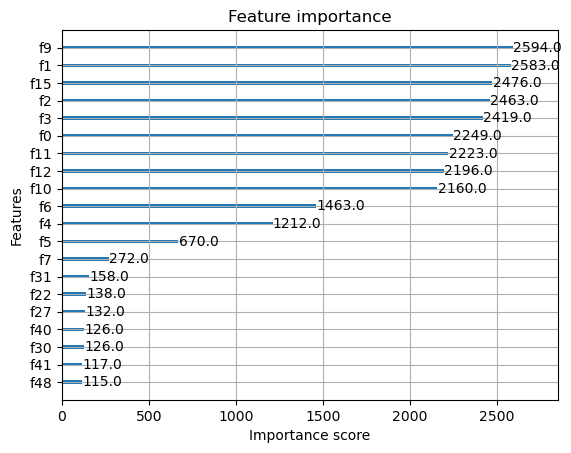

In [126]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, max_num_features=20)
plt.show()


In [127]:
# Predict class labels
y_pred = model.predict(X_test_np)  

# Predict probabilities for positive class (accidents)
y_proba = model.predict_proba(X_test_np)[:, 1]

In [128]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test_np, y_pred))
print("ROC AUC:", roc_auc_score(y_test_np, y_proba))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    761321
           1       0.89      0.61      0.72     70598

    accuracy                           0.96    831919
   macro avg       0.93      0.80      0.85    831919
weighted avg       0.96      0.96      0.96    831919

ROC AUC: 0.8036444399104608


In [134]:
# Take one row from your training data features (X_train)
template = X_train.iloc[0].copy()

# Modify some feature(s) for your custom case
template['amount'] = 123.45
template['hour_of_day'] = 14
# ... modify other features as needed

# Convert to DataFrame (1 row)
custom_df = pd.DataFrame([template])

# Predict
predicted_class = model.predict(custom_df)
predicted_proba = model.predict_proba(custom_df)[:, 1]

print("Predicted class:", predicted_class)
print("Predicted accident probability:", predicted_proba)


Predicted class: [0]
Predicted accident probability: [0.3251117]


In [136]:
feature_columns = X_train.columns.tolist()
print(len(feature_columns))  
print(feature_columns)


55
['amount', 'mean_24hr', 'stddev_30day', 'max_amount_7day', 'hour_of_day', 'day_of_week', 'day_of_month', 'month_of_year', 'is_weekend', 'time_since_last_txn', 'mean_amount_rolling', 'std_amount_rolling', 'amount_deviation_rolling', 'is_new_recipient', 'is_duplicate_transaction_within_X_minutes', 'time_deviation_from_user_norm', 'is_unusual_location_for_user', 'transaction_type_Credit Card (POS/Online)', 'transaction_type_Online Purchase (Non-Card)', 'transaction_type_Venmo/PayPal Transfer', 'city_Boston', 'city_Charlotte', 'city_Chicago', 'city_Columbus', 'city_Dallas', 'city_Denver', 'city_Fort Worth', 'city_Houston', 'city_Indianapolis', 'city_Jacksonville', 'city_Los Angeles', 'city_New York', 'city_Philadelphia', 'city_Phoenix', 'city_San Antonio', 'city_San Diego', 'city_San Francisco', 'city_Seattle', 'city_Washington', 'entity_type_Friend/Family Transfer', 'entity_type_Gas Station', 'entity_type_Grocery', 'entity_type_Healthcare', 'entity_type_Investment', 'entity_type_Loan P

In [137]:
import pandas as pd
import numpy as np

# List of all features
feature_columns = [
    'amount', 'mean_24hr', 'stddev_30day', 'max_amount_7day', 'hour_of_day',
    'day_of_week', 'day_of_month', 'month_of_year', 'is_weekend', 'time_since_last_txn',
    'mean_amount_rolling', 'std_amount_rolling', 'amount_deviation_rolling',
    'is_new_recipient', 'is_duplicate_transaction_within_X_minutes',
    'time_deviation_from_user_norm', 'is_unusual_location_for_user',
    'transaction_type_Credit Card (POS/Online)', 'transaction_type_Online Purchase (Non-Card)',
    'transaction_type_Venmo/PayPal Transfer', 'city_Boston', 'city_Charlotte', 'city_Chicago',
    'city_Columbus', 'city_Dallas', 'city_Denver', 'city_Fort Worth', 'city_Houston',
    'city_Indianapolis', 'city_Jacksonville', 'city_Los Angeles', 'city_New York',
    'city_Philadelphia', 'city_Phoenix', 'city_San Antonio', 'city_San Diego',
    'city_San Francisco', 'city_Seattle', 'city_Washington', 'entity_type_Friend/Family Transfer',
    'entity_type_Gas Station', 'entity_type_Grocery', 'entity_type_Healthcare',
    'entity_type_Investment', 'entity_type_Loan Payment', 'entity_type_Online Service',
    'entity_type_Person-to-Person', 'entity_type_Rent Payment', 'entity_type_Restaurant',
    'entity_type_Retail', 'entity_type_Small Business', 'entity_type_Specialty Store',
    'entity_type_Subscription Service', 'entity_type_Travel', 'entity_type_Utility Bill'
]

base_features = dict.fromkeys(feature_columns, 0)

# Fill numeric features with example values
base_features.update({
    'amount': 500.0,
    'mean_24hr': 450.0,
    'stddev_30day': 50.0,
    'max_amount_7day': 600.0,
    'hour_of_day': 14,
    'day_of_week': 2,
    'day_of_month': 15,
    'month_of_year': 7,
    'is_weekend': 0,
    'time_since_last_txn': 1,  
    'mean_amount_rolling': 460.0,
    'std_amount_rolling': 45.0,
    'amount_deviation_rolling': 0.9,
    'is_new_recipient': 0,
    'is_duplicate_transaction_within_X_minutes': 1, 
    'time_deviation_from_user_norm': 0.1,
    'is_unusual_location_for_user': 0
})

base_features['transaction_type_Credit Card (POS/Online)'] = 1

base_features['city_New York'] = 1

base_features['entity_type_Friend/Family Transfer'] = 1

custom_df = pd.DataFrame([base_features, base_features.copy()])

custom_df.loc[1, 'time_since_last_txn'] = 0.5

predicted_classes = model.predict(custom_df)
predicted_probs = model.predict_proba(custom_df)[:, 1]

for i, (cls, prob) in enumerate(zip(predicted_classes, predicted_probs), 1):
    print(f"Transaction {i} - Predicted class: {cls}, Accident probability: {prob:.4f}")


Transaction 1 - Predicted class: 1, Accident probability: 0.9451
Transaction 2 - Predicted class: 1, Accident probability: 0.9450


/var/folders/nd/vz39pkrs2r9bwv9tg2ysjr_40000gn/T/ipykernel_24316/2424902212.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  custom_df.loc[1, 'time_since_last_txn'] = 0.5


In [138]:
model.save_model('accidental_transaction_xgb_model.json')

In [139]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['amount', 'hour_of_day', 'day_of_week']
categorical_features = ['transaction_type', 'city', 'entity_type']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [140]:
import joblib

# Save pipeline
joblib.dump(pipeline, 'accidental_transaction_preprocessing_pipeline.joblib')

['accidental_transaction_preprocessing_pipeline.joblib']